In [69]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two of th main metrics:

    * MAE - Mean Absolute Error, "on average, how wrong is each of my model's prediction".

    * MSE - Mean Square Error, "square the average errors". 

In [70]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [71]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

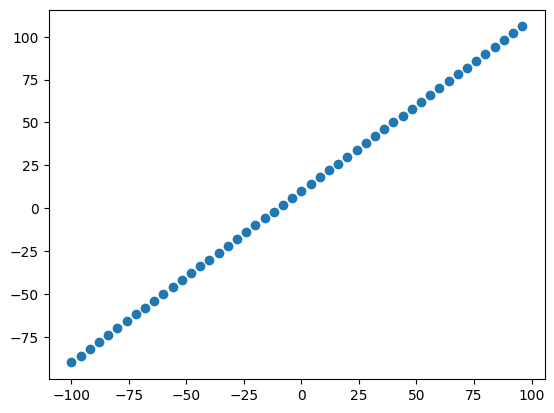

In [72]:
plt.scatter(X,y)
plt.show()

In [73]:
len(X), len(y)

(50, 50)

In [74]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [75]:
X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [76]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [77]:
tf.random.set_seed(42)

# Lets build our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer_1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Tensorflow_31")

# Compile the model
model.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [78]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [79]:
model.summary()

Model: "Tensorflow_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 input_layer_1 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# Evaluate the model on the test
model.evaluate(X_test, y_test) # since in our model we took loss and metrics as mae therefore we are obtaining the same value

1/1 [==============================] - 0s 70ms/step - loss: 6.1930 - mae: 6.1930


[6.192976951599121, 6.192976951599121]

In [81]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 34ms/step


array([[65.12518 ],
       [68.832245],
       [72.53933 ],
       [76.24641 ],
       [79.95348 ],
       [83.66057 ],
       [87.367645],
       [91.07471 ],
       [94.78179 ],
       [98.48886 ]], dtype=float32)

In [82]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true= y_test, y_pred=y_pred)
mae # Since the dimension of y_pred and y_test were not same, we were obtaining a numpy array of mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([22.874817, 19.167755, 15.968536, 13.452156, 11.618607, 10.467886,
       10.      , 10.214941, 11.112717, 12.693316], dtype=float32)>

In [83]:
y_pred - y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -5,  -9, -13, -17, -21, -25, -29, -33, -37, -41],
       [ -2,  -6, -10, -14, -18, -22, -26, -30, -34, -38],
       [  2,  -2,  -6, -10, -14, -18, -22, -26, -30, -34],
       [  6,   2,  -2,  -6, -10, -14, -18, -22, -26, -30],
       [  9,   5,   1,  -3,  -7, -11, -15, -19, -23, -27],
       [ 13,   9,   5,   1,  -3,  -7, -11, -15, -19, -23],
       [ 17,  13,   9,   5,   1,  -3,  -7, -11, -15, -19],
       [ 21,  17,  13,   9,   5,   1,  -3,  -7, -11, -15],
       [ 24,  20,  16,  12,   8,   4,   0,  -4,  -8, -12],
       [ 28,  24,  20,  16,  12,   8,   4,   0,  -4,  -8]])>

In [84]:
# Lets convert y_pred to a tensor 
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[65.12518 ],
       [68.832245],
       [72.53933 ],
       [76.24641 ],
       [79.95348 ],
       [83.66057 ],
       [87.367645],
       [91.07471 ],
       [94.78179 ],
       [98.48886 ]], dtype=float32)>

In [85]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [86]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([65.12518 , 68.832245, 72.53933 , 76.24641 , 79.95348 , 83.66057 ,
       87.367645, 91.07471 , 94.78179 , 98.48886 ], dtype=float32)>

In [87]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred = tf.squeeze(y_pred)) # after squeezing y_pred the dimensions of both y_test and y_pred are same and
# we obtain the value of mae same as the value we obtained from model.evaluate
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.192978>

In [88]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                     y_pred = y_pred) # again same thing, output mey fir se puri array print hogi mse ki
# dimension change akrne padege fir se y_pred ke
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([655.2572 , 499.40283, 371.03232, 270.14697, 196.74643, 150.83066,
       132.39987, 141.45383, 177.9927 , 242.01624], dtype=float32)>

In [89]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=39.06086>